# 703 多分类问题中的混淆矩阵

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.95

In [5]:
y_predict = log_reg.predict(X_test)

#### 多分类求精准率的时候要加入average

In [7]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict, average='micro')

0.95

#### 多分类混淆矩阵

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[37,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  1, 32]], dtype=int64)

#### 绘制混淆矩阵

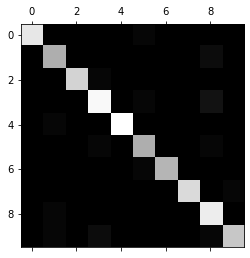

In [10]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)

#### 对角线代表数字0-10，分别被正确预测的值，然而我们对于未被正确预测的值更加感兴趣

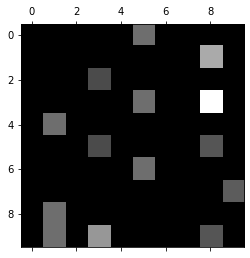

In [11]:
row_sums = np.sum(cfm, axis=1)
error_matrix = cfm / row_sums
np.fill_diagonal(error_matrix, 0)  # 对角线填充为0

plt.matshow(error_matrix,cmap=plt.cm.gray)

说明数字3，被误测为8的特别多，可以在3，8的二分类中（OVO,OVE）中做改进。